# Loss functions

Regressions model the relationship between **predictors** and **dependent variables**. But what is the relationship they are measuring, exactly, an how does it "fit" the model?

## Least squares loss

Say we have a dependent variable **Y** and an independent variable (predictor) **X**.

Standard linear regression solves for the **mean value of Y predicted using X and an intercept:**

### $$y = \beta_0+\beta_1x_1$$

It solves this by **minimizing the sum of squared errors:**

### $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

This is called a **loss function**. The "loss" is considered the increasing sum of squared errors, which indicate a bad fit between predictors and outcome. We minimize the loss by finding the smallest sum.

## Examining least squares loss graphically

To better understand what exactly is happening here when a regression line is fit, let's create some data generation functions and plots.

First load in these packages:

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Predictor generator

Below is a function that will generate n random predictors between 0 and a specified max range:

In [2]:
def generate_predictors(n, max_range=10):
    x = np.random.random_sample(n)*max_range
    return(x)

We can use it to create 25 predictors between 0 and 10:

In [3]:
predictors = generate_predictors(25, max_range=10)
print(predictors)

[ 5.6024085   9.11160555  4.68215034  7.77753581  9.62110481  5.59925771
  5.28933056  6.61283922  0.37164686  9.66120382  2.89704043  0.98264673
  1.45214889  0.48273383  9.15570002  7.22733775  1.05391018  7.06731981
  4.81080618  8.17457351  2.49088547  5.70057978  6.7504683   3.47601707
  2.3497104 ]


### Response generator

We can also define a function to generate the response (dependent) variable that will correspond to these predictor values:

In [4]:
def y_normal_noise_generator(x, noise_mean, noise_std):
    y = x + np.random.normal(noise_mean, noise_std, size=len(x))
    return y

By inputting the predictor values we have with a mean and standard deviation for the normal noise, we can get out linearly related (but not perfectly related!) response values:

In [5]:
responses = y_normal_noise_generator(predictors, 0, 4)
print(responses)

[  9.43316097   8.02914065   3.13728819   7.56784798  11.71938113
  13.02374163   9.16702377   3.96636809  -0.70359944  16.9930908
   1.90948268  -2.43086946   4.13325225  -1.6685609    3.18703412
   7.92341392   0.25176066   5.31775437  -5.38396766   6.84409032
   8.94793767   4.42004291   7.16993092  -1.10548436   4.03299422]


### Least squares linear regression

To fit a least squares linear regression between the predictors and response, we will use **OLS** from the statsmodels package that we imported earlier. **OLS** will fit the linear model and give us descriptive statistics about our model (not all of which we will cover now).

The function below will fit a model with your predictors and response, print out the summary of the model, and return the model:

In [6]:
def leastsq_reg(x, y):
    reg = sm.OLS(y, sm.add_constant(x)).fit()
    print reg.summary()
    return reg

Run the model using the function:

In [7]:
leastsq_mod = leastsq_reg(predictors, responses)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     15.88
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           0.000583
Time:                        09:29:53   Log-Likelihood:                -69.784
No. Observations:                  25   AIC:                             143.6
Df Residuals:                      23   BIC:                             146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.6782      1.653     -0.410      0.6

### Plotting the least squares model

Now that we have our least squares regression model, the function detailed below will plot

* The observation points
* The regression line
* The residuals (errors) from the points to our predicted response across values of x

In [8]:
def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    
    intercept = model.params[0]
    slope = model.params[1]

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),
                 'k-', ls='dashed', lw=1)
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()

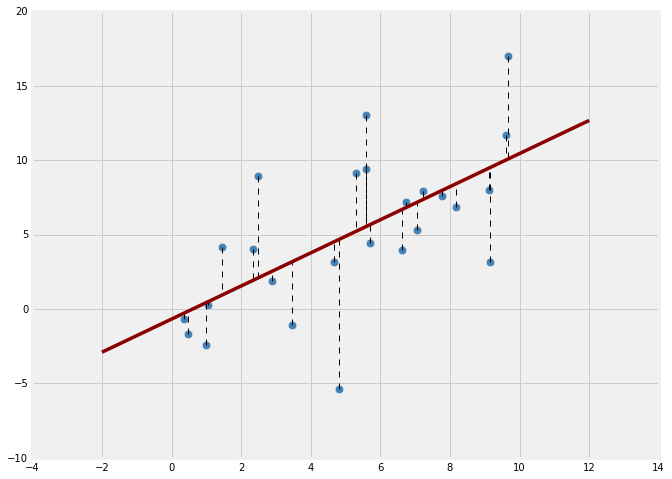

In [9]:
plot_regression(predictors, responses, leastsq_mod)

### Plot the least squares loss

For the regression we plotted, we can also plot the squared errors (true - predicted)^2 that the least squares loss function is minimizing. Below is a function to plot our errors for this regression along the least squares loss function curve:

In [10]:
def plot_leastsq_loss(model):
    plt.figure(figsize=(10,8))
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    for r in resids:
        plt.plot((r, r), (0, r**2), 'k-', ls='dashed', lw=2)
        
    plt.plot(resid_points, resid_points**2, c='gold', alpha=0.7)


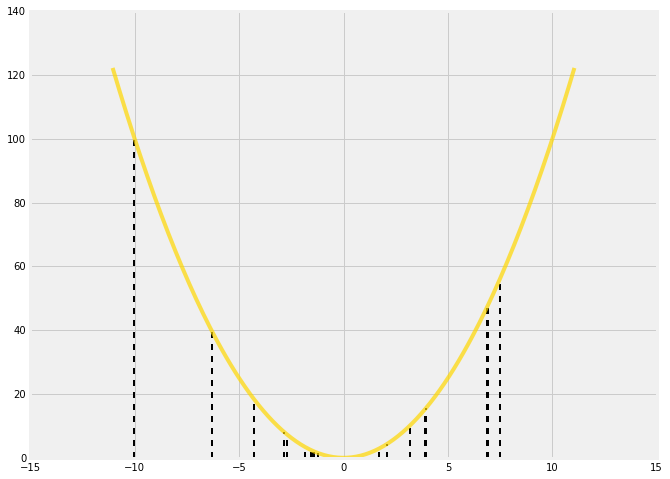

In [11]:
plot_leastsq_loss(leastsq_mod)

### Least squares loss with outliers

Why is the least squares loss sensitive to outliers?

Since the differences between the true value and the predicted value are squared, as the difference grows there is an exponential increase in loss!

Below is a function to generate a reponse vector with an observation that is an extreme outlier. 

In [16]:
def y_outlier_noise_generator(x, noise_mean, noise_std):
    y = x + np.random.normal(noise_mean, noise_std, size=len(x))
    y[0] = y[0]*noise_std*7
    return y

In [17]:
responses_outlier = y_outlier_noise_generator(predictors, 0, 4)
print(responses_outlier)

[  1.25934731e+02   5.42241522e+00   6.80752535e+00   1.60742952e+01
   1.68293890e+01   1.03088393e+01  -3.70914492e+00   5.72953694e+00
  -1.88992436e+00   8.59327978e+00   5.28316805e+00  -3.80461758e+00
  -1.36293784e-02  -2.76171524e+00   9.46063431e+00   1.28109081e+01
  -3.42972879e-03   4.14411479e+00   8.75968359e+00   1.04667818e+01
   4.88895474e+00  -2.06744790e+00   9.92669551e+00   9.61490699e+00
   5.92070945e+00]


Create a model with the response vector that includes the outlier

In [18]:
leastsq_outlier_mod = leastsq_reg(predictors, responses_outlier)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8843
Date:                Wed, 27 Apr 2016   Prob (F-statistic):              0.357
Time:                        10:07:58   Log-Likelihood:                -114.72
No. Observations:                  25   AIC:                             233.4
Df Residuals:                      23   BIC:                             235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.3752      9.972      0.238      0.8

Plot the outlier regression model:

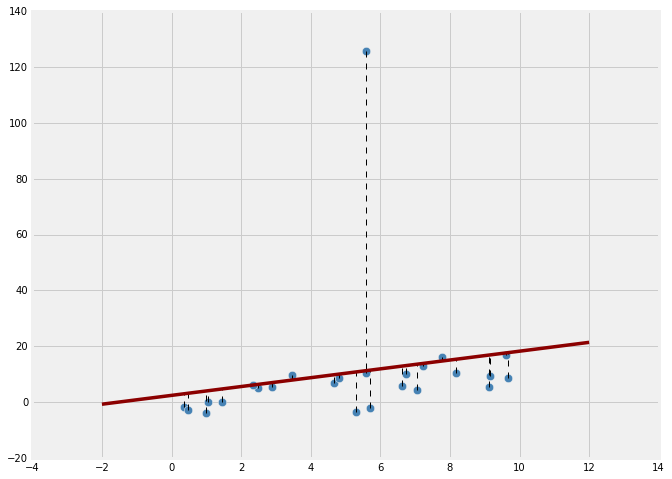

In [19]:
plot_regression(predictors, responses_outlier, leastsq_outlier_mod)

Plot the residual values vs. least squares loss function for the outlier regression model:

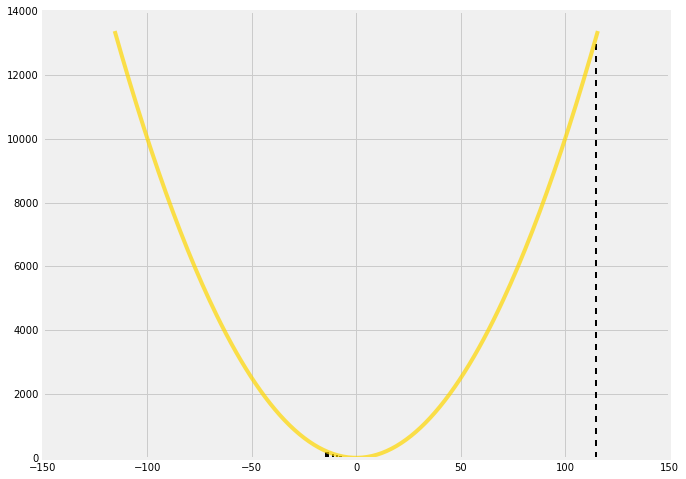

In [20]:
plot_leastsq_loss(leastsq_outlier_mod)

## Least absolute deviation loss

Our response variable now has an extreme outlier and the regression line is not modeling the relationship properly. However, we can change the loss function to predict the **median** of the response given our predictors rather than the **mean**.

Regression with least absolute deviation loss solves for the **median value of Y predicted using X and an intercept:**

### $$y = \sum_{i}{|\hat{y}_i - y_i |}$$

[NOTE: The vertical lines bracketing the difference between the prediction and true value indicate **magnitude**, which is equivalent to the absolute value of the difference.]

### Building the LAD regression

The statsmodels package comes with another regression called **QuantReg**, which we loaded earlier. 

Quantreg accepts the response and predictor values like the standard regression, but when fit takes a value **q**.

Below is the function for creating the quantile regression model:

In [21]:
def quantreg(x, y, q=0.5):
    reg = QuantReg(y, sm.add_constant(x)).fit(q=q)
    print reg.summary()
    return reg

The **q** parameter specifies the quantile, or percentile, that the regression is predicting. When **q = 0.5** the quantile regression loss function is the least absolute deviation. 

Build the LAD loss function regression with the outlier response vector:

In [22]:
lad_outlier_mod = quantreg(predictors, responses_outlier, q=0.5)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1265
Model:                       QuantReg   Bandwidth:                       8.737
Method:                 Least Squares   Sparsity:                        15.84
Date:                Wed, 27 Apr 2016   No. Observations:                   25
Time:                        10:21:21   Df Residuals:                       23
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.5531      3.183     -0.488      0.630        -8.137     5.031
x1             1.4704      0.538      2.736      0.012         0.358     2.582


Plot the LAD regression line:

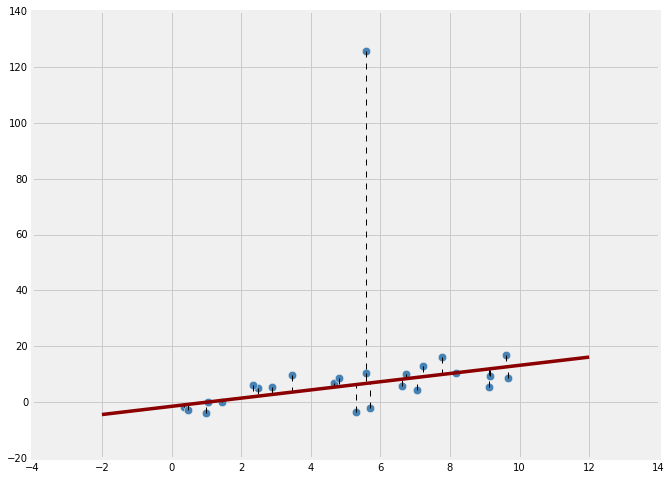

In [23]:
plot_regression(predictors, responses_outlier, lad_outlier_mod)

### LAD loss function graphically

What does the LAD loss function look like compared to the least squares loss function?

Below is a function that will plot the residual values against the LAD loss function.

In [24]:
def plot_residuals_ladloss(model):
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    plt.figure(figsize=(10,8))
    
    for r in resids:
        
        plt.plot((r, r), (0, abs(r)), 'k-', ls='dashed', lw=1)
        
    plt.plot(resid_points, np.abs(resid_points), c='gold', alpha=0.7)

Plot the LAD regression residuals against the LAD loss function

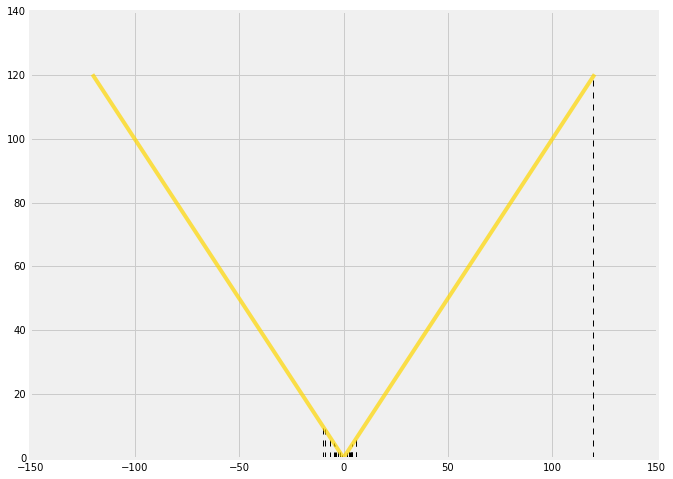

In [25]:
plot_residuals_ladloss(lad_outlier_mod)

### Visualizing the difference between regression loss function types

Below we have a function that will plot a least squares model as well as a LAD model. The least squares model will be plotted in red and the LAD model will be plotted in green.

In [225]:
def plot_lstsq_lad_regressions(x, y, sq_model, lad_model):
    
    sq_intercept = sq_model.params[0]
    sq_slope = sq_model.params[1]
    
    lad_intercept = lad_model.params[0]
    lad_slope = lad_model.params[1]
    
    plt.figure(figsize=(10,8))
    
    axes = plt.gca()
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    sq_regline_y = x_points*sq_slope + sq_intercept
    lad_regline_y = x_points*lad_slope + lad_intercept

    plt.plot(regline_x, sq_regline_y, c='red', lw=3)
    plt.plot(regline_x, lad_regline_y, c='green', lw=3)

    plt.show()

Plot both regressions with the outlier response:

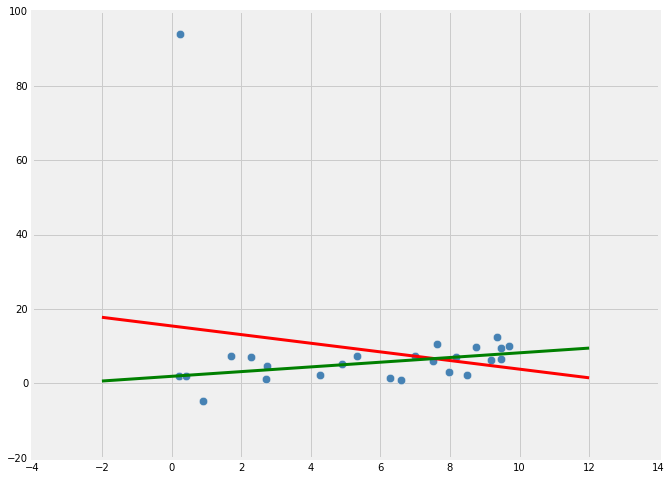

In [226]:
plot_lstsq_lad_regressions(predictors, responses_outlier, leastsq_outlier_mod, lad_outlier_mod)

Build an LAD regression model for the response vector not containing an outlier:

In [227]:
lad_mod = quantreg(predictors, responses, q=0.5)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3788
Model:                       QuantReg   Bandwidth:                       4.574
Method:                 Least Squares   Sparsity:                        9.453
Date:                Wed, 27 Apr 2016   No. Observations:                   25
Time:                        07:37:52   Df Residuals:                       23
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1006      1.889      0.583      0.566        -2.807     5.008
x1             0.9517      0.289      3.290      0.003         0.353     1.550


//anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


Plot each regression with the response vector not containing the outlier:

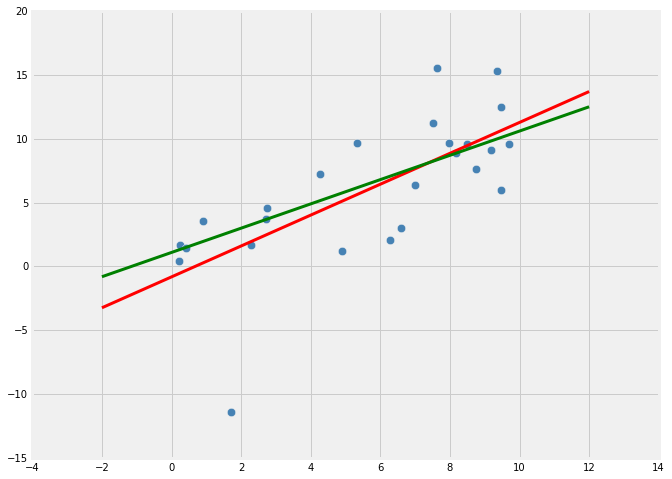

In [228]:
plot_lstsq_lad_regressions(predictors, responses, leastsq_mod, lad_mod)